In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [414]:
titanic=pd.read_csv("titanic.csv")

In [415]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [416]:
titanic.shape

(891, 12)

In [417]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [418]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [419]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [420]:
def bar_chart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    ds = pd.DataFrame([survived,dead])
    ds.index = ['Survived','Dead']
    ds.plot(kind='bar',stacked=True, figsize=(10,5))

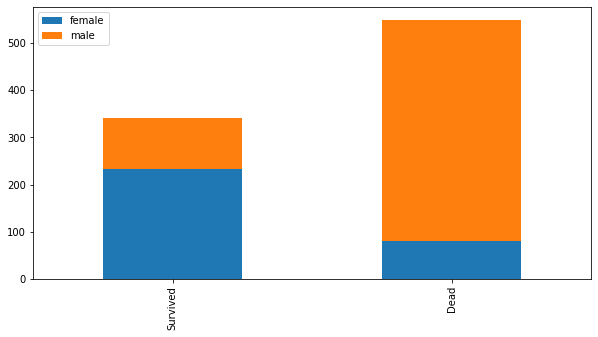

In [421]:
bar_chart('Sex')

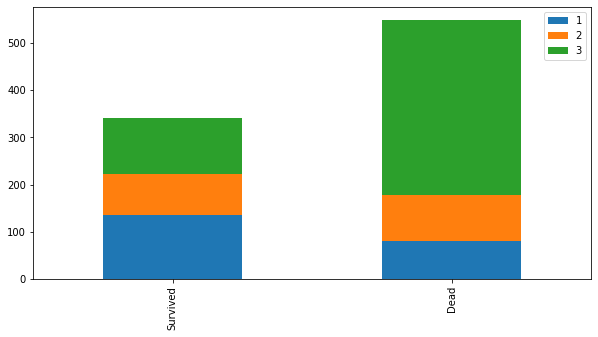

In [422]:
bar_chart('Pclass')

In [423]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [424]:
from sklearn.preprocessing import LabelEncoder

In [425]:
label=LabelEncoder()

In [426]:
titanic['Sex']=label.fit_transform(titanic['Sex'])

In [427]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [428]:
titanic['Age']  = titanic['Age'].fillna(titanic.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

In [429]:
titanic['Age'].isnull().sum()

0

In [430]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


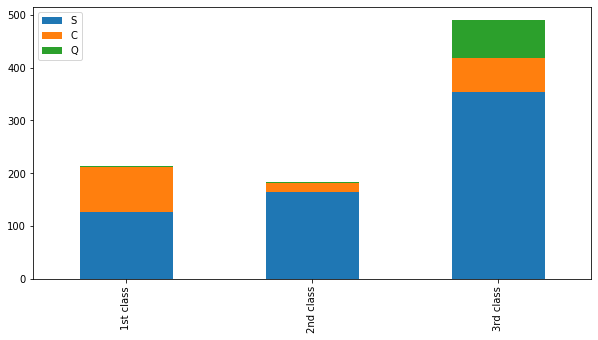

In [431]:
Pclass1 = titanic[titanic['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic[titanic['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic[titanic['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [432]:
titanic['Embarked'].fillna('S',inplace=True)

In [433]:
la=LabelEncoder()
titanic['Embarked']=la.fit_transform(titanic['Embarked'])

In [434]:
titanic['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [435]:
titanic.loc[ titanic['Fare'] <= 17, 'Fare'] = 0,
titanic.loc[(titanic['Fare'] > 17) & (titanic['Fare'] <= 30), 'Fare'] = 1,
titanic.loc[(titanic['Fare'] > 30) & (titanic['Fare'] <= 100), 'Fare'] = 2,
titanic.loc[ titanic['Fare'] > 100, 'Fare'] = 3
titanic['Fare']

0      0.0
1      2.0
2      0.0
3      2.0
4      0.0
      ... 
886    0.0
887    1.0
888    1.0
889    1.0
890    0.0
Name: Fare, Length: 891, dtype: float64

In [436]:
titanic['Cabin'].isnull().sum()

687

In [437]:
titanic['Cabin'] = titanic['Cabin'].str[:1]

In [438]:
titanic['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [439]:
titanic['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [440]:
titanic["Cabin"]=titanic["Cabin"].map({"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G":6 , "T": 7})

In [441]:
titanic["Cabin"].isnull().sum()

687

In [442]:
titanic["Cabin"].fillna(titanic.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [443]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,5.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,2.0,2.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,2.0,2.0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,5.0,2


In [444]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1


In [445]:
df = titanic.drop(['Name','Ticket','SibSp','Parch'], axis=1)

In [446]:
df.set_index('PassengerId',inplace=True)

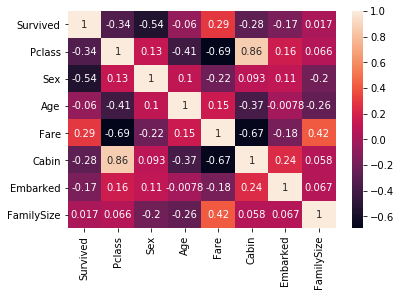

In [447]:
sns.heatmap(df.corr(),annot=True)

In [448]:
y=df['Survived']
x=df.drop(['Survived'],axis=1)

In [457]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
collist=['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'FamilySize']
x=pd.DataFrame(scaler.fit_transform(x),columns= collist)

In [450]:
x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,1.0,1.0,0.271174,0.000000,0.714286,1.0,0.1
1,0.0,0.0,0.472229,0.666667,0.285714,0.0,0.1
2,1.0,0.0,0.321438,0.000000,0.714286,1.0,0.0
3,0.0,0.0,0.434531,0.666667,0.285714,1.0,0.1
4,1.0,1.0,0.434531,0.000000,0.714286,1.0,0.0
